In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyntcloud import PyntCloud
from pyntcloud import scalar_fields
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors.kde import KernelDensity
import pickle
#import keras
#import tensorflow

In [2]:
##The point cloud dataset is taken as input and it is stored in the form of pandas dataframe
cloud=PyntCloud.from_file("/home/research_centre_gpu/PointCloud/rueMadame_database/GT_Madame1_3.ply")
print(cloud)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -7.090676784515381, -124.74476623535156, 45.12932205200195
Other attributes:



In [3]:
cloud.points.head()

,x,y,z,reflectance,label,class
0,4.971637,-79.606361,43.221432,135.0,13,1
1,3.571728,-81.574989,42.445904,195.0,323,2
2,4.993350,-79.458405,43.303757,135.0,13,1
3,3.720481,-81.474182,42.465771,195.0,323,2
4,5.009287,-79.310478,43.387627,155.0,13,1


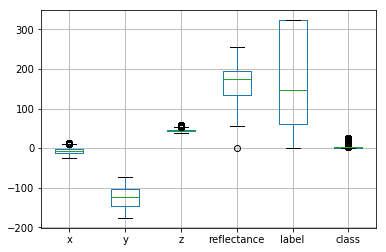

In [4]:
cloud.points.boxplot()

In [5]:
##Visualization of point cloud
cloud.plot()

ImportError: pythreejs is needed for plotting with pythreejs backend.

In [6]:
cloud1=PyntCloud.from_file("/home/research_centre_gpu/PointCloud/rueMadame_database/GT_Madame1_2.ply")
print(cloud1)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -12.104286193847656, -197.56027221679688, 46.1270637512207
Other attributes:



In [7]:
cloud1.plot()

ImportError: pythreejs is needed for plotting with pythreejs backend.

In [8]:
#cloud3=PyntCloud(cloud.points[cloud.points["class"]!=2])
#cloud3=PyntCloud(cloud3.points[cloud3.points["class"]!=1])

In [9]:
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud,voxel=0.5)
cloud1.points["class"].value_counts()

1     5209018
2     3691236
4     1044561
10      17122
22       7515
9        6392
25       5173
14       4017
26       3434
7        2610
21       2374
19       2356
15       2144
23       1246
20        791
0          11
Name: class, dtype: int64

In [10]:
cloud1.plot()

ImportError: pythreejs is needed for plotting with pythreejs backend.

In [11]:
##Cacluate 50 neighbours for determining the geometrical features of each point
neigh=cloud1.get_neighbors(k=50)


In [12]:
neigh.shape

(10000000, 50)

In [13]:
#The commented features are not used because the computation is a little high for these features and only the 
#geometrical features are used
'''
#kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud3.points[['x','y','z']])
#density=kde.score_samples(cloud3.points[['x','y','z']])
#cloud3.points.add(density,axis=1)

#vox=cloud3.add_structure("voxelgrid")
#vox_x=cloud3.add_scalar_field("voxel_x",voxelgrid_id=vox)
#vox_y=cloud3.add_scalar_field("voxel_y",voxelgrid_id=vox)
#vox_n=cloud3.add_scalar_field("voxel_n",voxelgrid_id=vox)
#vox_z=cloud3.add_scalar_field("voxel_z",voxelgrid_id=vox)
#inc=cloud.add_scalar_field("inclination_degrees")
#ori=cloud.add_scalar_field("orientation_degrees")
'''
eig=cloud1.add_scalar_field("eigen_values",k_neighbors=neigh)
ani=cloud1.add_scalar_field("anisotropy",ev=eig)
cur=cloud1.add_scalar_field("curvature",ev=eig)
eigent=cloud1.add_scalar_field("eigenentropy",ev=eig)
su=cloud1.add_scalar_field("eigen_sum",ev=eig)
lin=cloud1.add_scalar_field("linearity",ev=eig)
om=cloud1.add_scalar_field("omnivariance",ev=eig)
pla=cloud1.add_scalar_field("planarity",ev=eig)
sph=cloud1.add_scalar_field("sphericity",ev=eig)


In [15]:
cloud1.points.head()

,x,y,z,reflectance,label,class,e1(51),e2(51),e3(51),anisotropy(51),curvature(51),eigenentropy(51),eigen_sum(51),linearity(51),omnivariance(51),planarity(51),sphericity(51)
0,-4.727719,-167.917969,48.730968,155.0,2,1,0.002010,0.001838,0.000149,0.926060,0.037189,0.025371,0.003997,0.085686,0.000819,0.840374,0.073940
1,-4.690648,-170.307953,47.476875,135.0,2,1,0.001785,0.000653,0.000285,0.840181,0.104769,0.018415,0.002724,0.634371,0.000693,0.205810,0.159819
2,-4.722405,-167.779922,48.810974,135.0,2,1,0.002532,0.001864,0.000300,0.881644,0.063822,0.029286,0.004696,0.263888,0.001123,0.617757,0.118356
3,-4.795055,-170.033386,47.539791,115.0,2,1,0.002034,0.001184,0.000746,0.633181,0.188236,0.025956,0.003964,0.418097,0.001216,0.215084,0.366819
4,-4.806955,-167.600601,48.839016,115.0,2,1,0.003185,0.001483,0.000141,0.955599,0.029404,0.029225,0.004810,0.534379,0.000874,0.421220,0.044401


In [16]:
cloud1.points.to_csv("features_calculated_train.csv",index=False)

In [17]:
tree=RandomForestClassifier()

In [19]:

cloud1.points.drop(labels=["label"],inplace=True,axis=1)
cloud1.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)
target=cloud1.points["class"]
cloud1.points.drop(labels=["class"],inplace=True,axis=1)

In [21]:
tree.fit(cloud1.points,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
prediction=tree.predict(cloud1.points)
print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.9724274


This is the part where the feature extraction process is applied on the test set

In [25]:
#Downsampling not required as the dataset is already cleaned
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud1,voxel=0.5)
#p linkage segmentation and shape distribution histogram

In [27]:
# Saving the model
import pickle
filename = "random_forest.sav"
pickle.dump(tree,open(filename,'wb'))

# Test Set Evaluation

In [7]:
model2 = pickle.load(open("random_forest.sav","rb"))

In [8]:
neigh1=cloud.get_neighbors(k=50)

In [9]:
neigh1.shape

(10000000, 50)

In [10]:
#kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud.points[['x','y','z']])
#density=kde.score_samples(cloud.points[['x','y','z']])
#cloud.points.add(density,axis=1)
#vox=cloud.add_structure("voxel_grid",x_y_z=cloud.points[['x','y','z']])
#vox_x=cloud.add_scalar_field("voxel_x",voxelgrid_id=vox)
#vox_y=cloud.add_scalar_field("voxel_y",voxelgrid_id=vox)
#vox_z=cloud.add_scalar_field("voxel_z",voxelgrid_id=vox)
#inc=cloud.add_scalar_field("inclination_degrees")
#ori=cloud.add_scalar_field("orientation_degrees")
eig=cloud.add_scalar_field("eigen_values",k_neighbors=neigh1)
print("eigen values calculated!")
ani=cloud.add_scalar_field("anisotropy",ev=eig)
print("anisotropy calculated!")
cur=cloud.add_scalar_field("curvature",ev=eig)
print("curvature calculated!")
eigent=cloud.add_scalar_field("eigenentropy",ev=eig)
print("eigenentropy calculated!")
su=cloud.add_scalar_field("eigen_sum",ev=eig)
print("eigen_sum calculated!")
lin=cloud.add_scalar_field("linearity",ev=eig)
print("linearity calculated!")
om=cloud.add_scalar_field("omnivariance",ev=eig)
print("omnivariance calculated!")
pla=cloud.add_scalar_field("planarity",ev=eig)
print("planarity calculated!")
sph=cloud.add_scalar_field("sphericity",ev=eig)
print("sphericity calculated!")

eigen values calculated!
anisotropy calculated!
curvature calculated!
eigenentropy calculated!
eigen_sum calculated!
linearity calculated!
omnivariance calculated!
planarity calculated!
sphericity calculated!


In [11]:
cloud.points.drop(labels=["label"],inplace=True,axis=1)
target1=cloud.points["class"]
cloud.points.drop(labels=["class"],inplace=True,axis=1)
cloud.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)

In [13]:
prediction1=model2.predict(cloud.points)

In [14]:
print("Accuracy:",accuracy_score(target1,prediction1))

Accuracy: 0.6434281
